In [7]:
# Part 1: Regression analysis of Gapminder data



In [8]:
import pandas as pd

gap_data = './datasets/08_gap-every-five-years.tsv'
df = pd.read_csv(gap_data, sep='\t')
df.tail()

,country,continent,year,lifeExp,pop,gdpPercap
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


In [9]:
#years_grouped = df.sort_values(by=['year'])
#years_grouped.head()

In [10]:

import rpy2
from plotnine import *

%matplotlib inline

from rpy2.robjects import pandas2ri

pandas2ri.activate()

ValueError: r_home is None. Try python -m rpy2.situation

In [5]:
%load_ext rpy2.ipython

In [6]:
%%R
library('ggplot')



R[write to console]: Error in library("ggplot") : there is no package called ‘ggplot’


Error in library("ggplot") : there is no package called ‘ggplot’


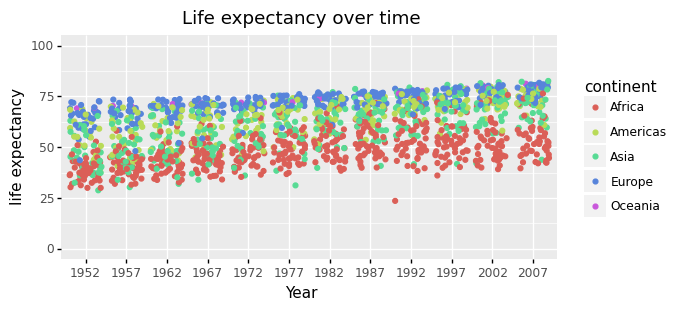

<ggplot: (8750639194902)>

In [7]:
## Part 1, Exercise 1:

#type(df['year'])

#plot = ggplot(df) + geom_point(aes(x='factor(year)', y='lifeExp', color='continent')) + labs(title="Life expectancy over time", x = "year", y = "life expectancy") + scale_x_discrete(breaks=list(df['year'].unique()), labels=list(df['year'].unique())) + geom_jitter(width = 0.5, height = 0.5)

ggplot(df, aes(x='factor(year)', y='lifeExp', color='continent')) + labs(title="Life expectancy over time", x = "Year", y = "life expectancy") + geom_jitter() + ylim(0, 100) + coord_fixed(ratio=.05) 




In [8]:
## Part 1, Question 1: Is there a general trend (e.g., increasing or decreasing) for life expectancy across time? Is this trend linear?

## It appears that the life expectancy is generally increasing across the entire human population.  Upon visual inspection, it does appear is to be increasing at a linear rate looking at this graph; although, looking at the violin plot in the provided example code appears to have more going on.

In [9]:
## Part 1, Question 2: How would you describe the distribution of life expectancy across countries for individual years? Is it skewed, or not? Unimodal or not? Symmetric around it’s center?

## The distribution of life expectancy across countries for individual years appears stable, with a few exceptions such as what may be the Rwandan genocide in 1994.  Countries highest on the life expectancy plot also appear to have a slower, but more stable increase in life expectancy.

In [10]:
## Part 1, Question 3: Suppose I fit a linear regression model of life expectancy vs. year (treating it as a continuous variable), and test for a relationship between year and life expectancy, will you reject the null hypothesis of no relationship?

## 

In [11]:
## Part 1, Question 4: What would a violin plot of residuals from the linear model in Question 3 vs. year look like?

##

In [12]:
## Part 1, Question 5: According to the assumptions of the linear regression model, what should that violin plot look like? That is, consider the assumptions the linear regression model you used assumes (e.g., about noise, about input distributions, etc); do you think everything is okay?

##

In [ ]:
## Part 1, Exercise 2: Fit a linear regression model using, e.g., the LinearRegression function from Scikit-Learn or the closed-form solution we derived in class, for life expectancy vs. year (as a continuous variable). There is no need to plot anything here, but please print the fitted model out in a readable format.

from sklearn import linear_model
import matplotlib.pyplot as plt

y = df.groupby(['year'])['lifeExp'].agg('mean')
X = pd.DataFrame(y)


reg = linear_model.LinearRegression()
reg.fit(X, y.index.values)
#y.shape

reg.coef_
X.to_numpy()

plt.scatter(X.to_numpy(),  y.index.values,  color='black')
plt.plot(X.to_numpy(), y.index.values, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()